In [3]:
import pandas as pd
import numpy as np # for mathematical calculations
import matplotlib.pyplot as plt 
from datetime import datetime
from pandas import Series
%matplotlib inline
import warnings

# Loading Data

In [4]:
TS_train = r'C:\Users\Admin\Desktop\Desktop\Data Sceince\Analytics Vidhya\Time Series Arima\Train_SU63ISt.csv'
TS_test = r'C:\Users\Admin\Desktop\Desktop\Data Sceince\Analytics Vidhya\Time Series Arima\Test_0qrQsBZ.csv'

# Reading Data

In [5]:
TS_train = pd.read_csv(TS_train)
TS_test = pd.read_csv (TS_test)

In [6]:
TS_train.columns, TS_test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [7]:
TS_train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [8]:
TS_train.shape, TS_test.shape

((18288, 3), (5112, 2))

In [9]:
TS_train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


# Lets do feature engineering to transform and create columns

# Converting datetime column from object to datetime

In [10]:
TS_train['Datetime'] = pd.to_datetime(TS_train.Datetime, format='%d-%m-%Y %H:%M')
TS_test['Datetime'] = pd.to_datetime(TS_test.Datetime, format='%d-%m-%Y %H:%M')

In [11]:
TS_train.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


# Extracting and creating year month day & hour from Datetime column

In [12]:
for i in (TS_train, TS_test):
    i["year"] = i.Datetime.dt.year
    i["month"] = i.Datetime.dt.month
    i["day"] = i.Datetime.dt.day
    i["hour"] = i.Datetime.dt.hour

In [13]:
TS_train.head()

,ID,Datetime,Count,year,month,day,hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


# Creating new column dayoftheweek to check if the day is weekday or weekend

In [14]:
TS_train["dayoftheweek"] = TS_train["Datetime"].dt.dayofweek

In [15]:
TS_train.head()

,ID,Datetime,Count,year,month,day,hour,dayoftheweek
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


# Creating a function which will create new column Weekend which will show 1 if the day is weekend and 0 if day is weekday

In [16]:
def applyer(dayoftheweek):
    if dayoftheweek == 5 or dayoftheweek == 6:
        return 1
    else:
        return 0

temp = TS_train["dayoftheweek"].apply(applyer)

In [17]:
TS_train["Weekend"] = temp

In [18]:
TS_train.head()

,ID,Datetime,Count,year,month,day,hour,dayoftheweek,Weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


# Lets generate Hypothesis. Hypothesis generation gives insight of the dataset and also help us understand factors which can affect our dependent variable.

1. Passenger traffic is increasing year on year
2. Passenger traffic will be high in some months (during holidays and tourist visits)
3. Passenger traffic during peak hours will be high 
4. Passenger traffic will be more during weekdays as compared to weekends

# Lets find the sum of passengers per year to find out if passengers traffic is increasing or decreasing year on year

In [19]:
TS_train.pivot_table(index=["year"], values="Count",aggfunc="sum")

,Count
year,
2012,34932
2013,685968
2014,1820366


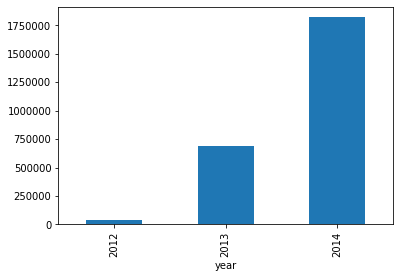

In [20]:
TS_train.groupby("year")["Count"].sum().plot.bar()

# From above table and bar chart we can see that passenger traffic is in increasing exponentially year on year, validating our 1st hypothesis 

# Lets sum the passenger count monthwise to see the trend

In [21]:
TS_train.pivot_table(index=["year","month"], values="Count",aggfunc="sum")

Count
year month        
2012 8         496
     9        3200
     10       8174
     11      11396
     12      11666
2013 1       13712
     2       14912
     3       17550
     4       24772
     5       33936
     6       41280
     7       55642
     8       74502
     9       86936
     10     104110
     11     101520
     12     117096
2014 1      124400
     2      134536
     3      136892
     4      173488
     5      196786
     6      227602
     7      255456
     8      290146
     9      281060

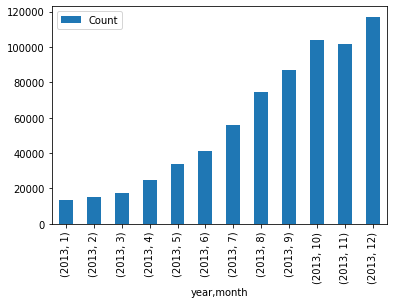

In [40]:
Year2013.pivot_table(index=["year","month"], values="Count",aggfunc="sum").plot.bar()

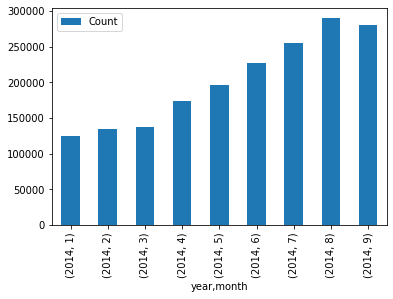

In [39]:
Year2014.pivot_table(index=["year","month"], values="Count",aggfunc="sum").plot.bar()

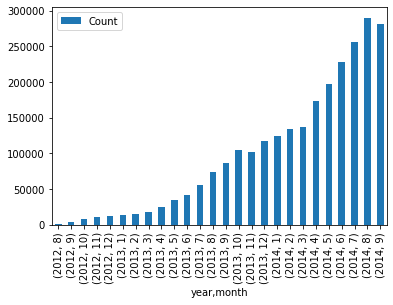

In [22]:
TS_train.pivot_table(index=["year","month"], values="Count",aggfunc="sum").plot.bar()

# From the above bar charts we can see increasing trend throught out the months but cannot see any significant spike in any of the months suggesting increase in traffic during holiday season, so our 2nd hypothesis doesn't hold significance

# Lets sum hourly passenger count to check traffic during peak hours 

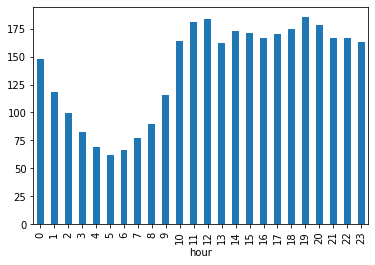

In [62]:
TS_train.groupby("hour")["Count"].mean().plot.bar()

# From the above bar chart we can see that peak hours are from 10AM to 11PM, validating our 3rd hypothesis

# Lets check the passenger traffic during weekdays and weekends

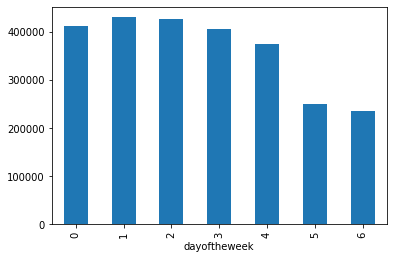

In [24]:
TS_train.groupby("dayoftheweek")["Count"].sum().plot.bar()

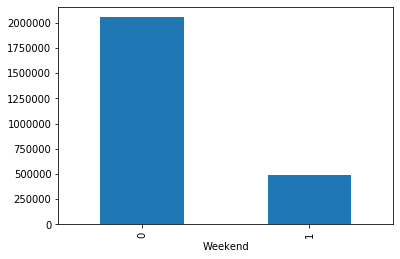

In [27]:
TS_train.groupby("Weekend")["Count"].sum().plot.bar()

# From above bar charts we can see that passenger traffic is more during weekdays as compared to weekends, validating our 4th hypothesis